In [54]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
from keras.layers import Input

#pip install tensorflow (executar no Anaconda Prompt)

Text(0.5, 1.0, '0')

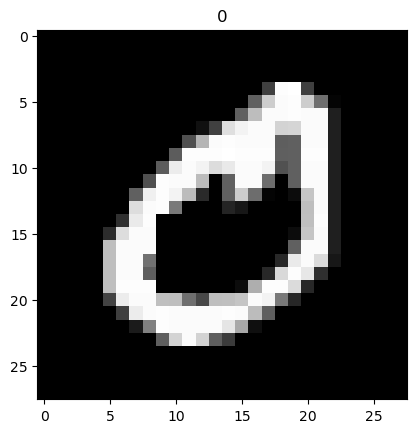

In [56]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [58]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [62]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [64]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento /= 255
X_teste /= 255

In [66]:
# Transformação para o formato dummy (temos 10 classes)
y_treinamento = to_categorical(y_treinamento, 10)
y_teste = to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [68]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#camada de saida, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

In [70]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,210 (231.29 KB)

 Trainable params: 59,210 (231.29 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 100,
                       validation_data = (X_teste, y_teste))

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7577 - loss: 0.7615 - val_accuracy: 0.9492 - val_loss: 0.1742
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9284 - loss: 0.2446 - val_accuracy: 0.9602 - val_loss: 0.1336
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9452 - loss: 0.1874 - val_accuracy: 0.9667 - val_loss: 0.1112
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9521 - loss: 0.1642 - val_accuracy: 0.9700 - val_loss: 0.1019
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9563 - loss: 0.1491 - val_accuracy: 0.9715 - val_loss: 0.0964
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9597 - loss: 0.1366 - val_accuracy: 0.9686 - val_loss: 0.1039
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9622 - loss: 0.1283 - val_accuracy: 0.9720 - val_loss: 0.0951
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9630 - loss: 0

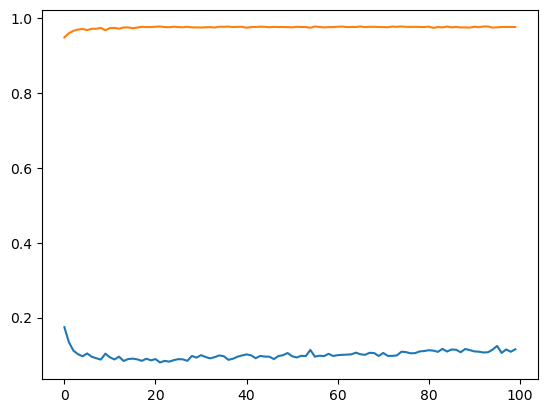

In [73]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

In [74]:
# Obtenção das previsões 
previsoes = modelo.predict(X_teste)
previsoes

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step


array([[6.7832433e-23, 6.6793440e-14, 3.6797895e-13, ..., 1.0000000e+00,
        2.3984026e-20, 2.6363738e-11],
       [2.4638652e-19, 1.1251944e-12, 1.0000000e+00, ..., 5.6386509e-15,
        3.4803288e-13, 8.3134363e-25],
       [2.1206663e-17, 9.9999928e-01, 8.1168655e-11, ..., 6.1313040e-07,
        1.6535911e-07, 3.1915741e-11],
       ...,
       [2.4791196e-27, 1.7375137e-13, 3.5132745e-14, ..., 6.8474212e-11,
        1.3579554e-16, 2.4254525e-09],
       [2.0316366e-18, 6.1518510e-16, 8.0809391e-15, ..., 6.3099778e-16,
        2.4276436e-15, 4.3400635e-13],
       [5.9765171e-15, 2.3337876e-22, 4.8902317e-20, ..., 1.7760394e-32,
        2.3590232e-19, 6.5295685e-34]], dtype=float32)

In [75]:
# valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 971,    0,    0,    0,    0,    2,    2,    1,    4,    0],
       [   0, 1122,    1,    2,    0,    0,    1,    2,    7,    0],
       [   3,    2, 1010,    1,    4,    0,    2,    5,    4,    1],
       [   0,    0,    5,  986,    0,    8,    0,    5,    1,    5],
       [   2,    1,    1,    0,  960,    0,    5,    1,    0,   12],
       [   3,    1,    0,   11,    2,  864,    4,    3,    3,    1],
       [   6,    2,    1,    0,    2,    4,  939,    0,    4,    0],
       [   2,    2,   11,    3,    1,    0,    0, 1002,    1,    6],
       [   4,    0,    2,    2,    4,    7,    3,    7,  943,    2],
       [   1,    3,    1,    2,   19,    0,    2,    8,    3,  970]],
      dtype=int64)

In [88]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
#número 4
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [90]:
#passo a mesma posição para o modelo prever
novo = X_treinamento[20]
#de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
#previsao
pred = modelo.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


[4]

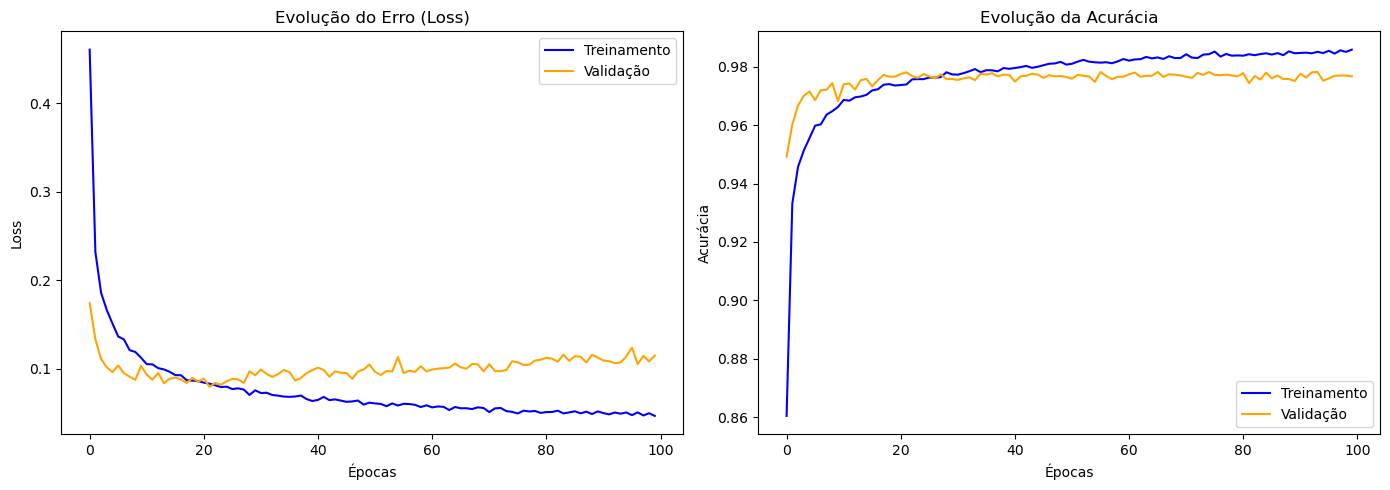

In [92]:
# Visualização da evolução do erro e acurácia durante o treinamento
plt.figure(figsize=(14, 5))

# Gráfico do Loss (Erro)
plt.subplot(1, 2, 1)
plt.plot(historico.history['loss'], label='Treinamento', color='blue')
plt.plot(historico.history['val_loss'], label='Validação', color='orange')
plt.title('Evolução do Erro (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Gráfico da Acurácia
plt.subplot(1, 2, 2)
plt.plot(historico.history['accuracy'], label='Treinamento', color='blue')
plt.plot(historico.history['val_accuracy'], label='Validação', color='orange')
plt.title('Evolução da Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()

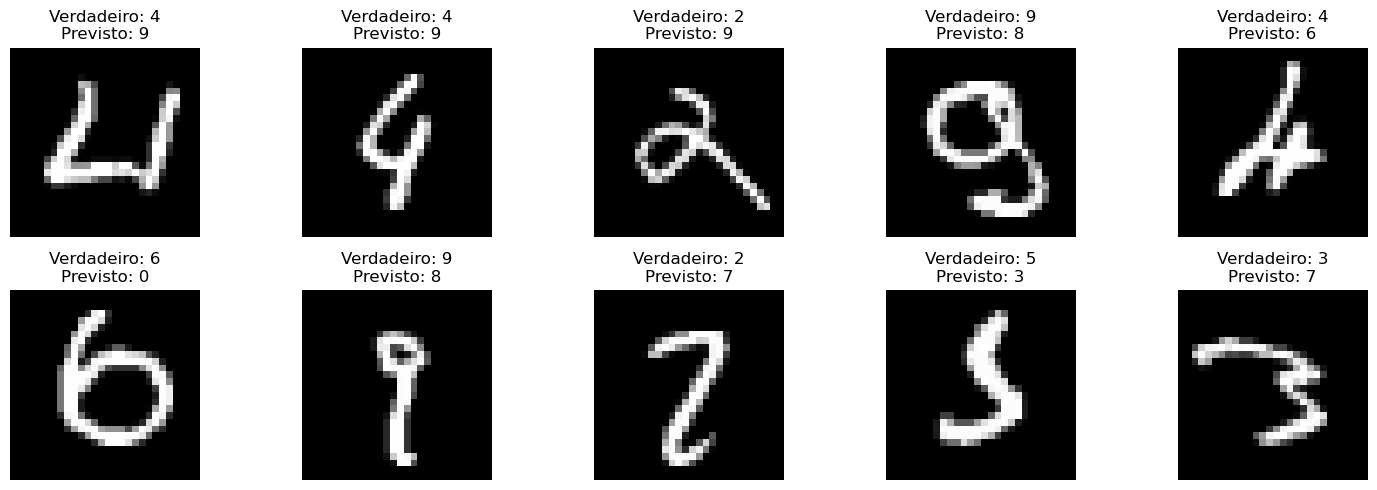

In [94]:
# Visualizar os primeiros 10 erros do modelo
erros_idx = np.where(np.array(y_teste_matriz) != np.array(y_previsoes_matriz))[0]

plt.figure(figsize=(15, 5))
for i, idx in enumerate(erros_idx[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_teste[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Verdadeiro: {y_teste_matriz[idx]}\nPrevisto: {y_previsoes_matriz[idx]}')
    plt.axis('off')
plt.tight_layout()
plt.show()